In [1]:
#Import Libraries
import gc
import shutil
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import classification_report
import optuna
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import warnings
warnings.filterwarnings("ignore")

c:\Users\ASUS\.conda\envs\mlops\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv(r'D:\Work Station\startups\data\companies.csv')
df.head()

,id,Unnamed: 0.1,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,...,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at,lat,lng,ROI
0,c:1,0,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,...,2010-09-05,2013-09-18,5.0,17.0,initial-importer,2007-05-25 06:51:27,2013-04-13 03:29:00,47.606209,-122.332071,15.5
1,c:10,1,Company,10,NaN,Flektor,flektor,/company/flektor,games_video,acquired,...,NaN,NaN,NaN,6.0,initial-importer,2007-05-31 21:11:51,2008-05-23 23:23:14,34.021122,-118.396467,NaN
2,c:100,2,Company,100,NaN,There,there,/company/there,games_video,acquired,...,2003-02-01,2011-09-23,4.0,12.0,initial-importer,2007-08-06 23:52:45,2013-11-04 02:09:48,37.562992,-122.325525,NaN
3,c:10000,3,Company,10000,NaN,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,...,NaN,NaN,NaN,NaN,NaN,2008-08-24 16:51:57,2008-09-06 14:19:18,NaN,NaN,NaN
4,c:10001,4,Company,10001,NaN,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,...,NaN,NaN,NaN,NaN,NaN,2008-08-24 17:10:34,2008-09-06 14:19:18,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196553 entries, 0 to 196552
Data columns (total 44 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   196553 non-null  object 
 1   Unnamed: 0.1         196553 non-null  int64  
 2   entity_type          196553 non-null  object 
 3   entity_id            196553 non-null  int64  
 4   parent_id            0 non-null       float64
 5   name                 196530 non-null  object 
 6   normalized_name      196527 non-null  object 
 7   permalink            196553 non-null  object 
 8   category_code        123186 non-null  object 
 9   status               196553 non-null  object 
 10  founded_at           91227 non-null   object 
 11  closed_at            2620 non-null    object 
 12  domain               126545 non-null  object 
 13  homepage_url         126545 non-null  object 
 14  twitter_username     80591 non-null   object 
 15  logo_url         

In [4]:
df.describe()

,Unnamed: 0.1,entity_id,parent_id,logo_width,logo_height,investment_rounds,invested_companies,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,ROI
count,196553.000000,196553.000000,0.0,110110.000000,110110.000000,2591.000000,2591.000000,31707.000000,2.787400e+04,91699.000000,129667.000000,83852.000000,83852.000000,726.000000
mean,98276.000000,153006.227333,NaN,459.132685,222.728917,2.372057,2.204940,1.659760,1.481652e+07,1.199402,2.852067,37.564512,-52.123066,45.745037
std,56740.108067,90209.250941,NaN,594.982577,333.090722,12.173510,11.436955,1.201666,6.775937e+07,0.540099,9.100309,15.477102,70.049067,572.035638
min,0.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,2.910000e+02,1.000000,1.000000,-50.942326,-159.497746,0.011111
25%,49138.000000,59850.000000,NaN,192.000000,70.000000,1.000000,1.000000,1.000000,5.000000e+05,1.000000,1.000000,34.052234,-111.940005,2.648879
50%,98276.000000,174539.000000,NaN,267.000000,105.000000,1.000000,1.000000,1.000000,2.564500e+06,1.000000,1.000000,39.768403,-77.036871,6.500497
75%,147414.000000,232655.000000,NaN,484.000000,232.000000,1.000000,1.000000,2.000000,1.100000e+07,1.000000,3.000000,45.421530,-0.127758,13.549900
max,196552.000000,286215.000000,NaN,18200.000000,9600.000000,478.000000,459.000000,15.000000,5.700000e+09,9.000000,1189.000000,77.553604,176.212549,13333.333333


In [5]:
df.isnull().sum()

id                          0
Unnamed: 0.1                0
entity_type                 0
entity_id                   0
parent_id              196553
name                       23
normalized_name            26
permalink                   0
category_code           73367
status                      0
founded_at             105326
closed_at              193933
domain                  70008
homepage_url            70008
twitter_username       115962
logo_url                86443
logo_width              86443
logo_height             86443
short_description      189422
description            104505
overview                69582
tag_list               115101
country_code           108563
state_code             145650
city                   112663
region                      0
first_investment_at    193970
last_investment_at     193970
investment_rounds      193962
invested_companies     193962
first_funding_at       165046
last_funding_at        165046
funding_rounds         164846
funding_to

In [6]:
df.columns

Index(['id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'name',
       'normalized_name', 'permalink', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'homepage_url', 'twitter_username', 'logo_url',
       'logo_width', 'logo_height', 'short_description', 'description',
       'overview', 'tag_list', 'country_code', 'state_code', 'city', 'region',
       'first_investment_at', 'last_investment_at', 'investment_rounds',
       'invested_companies', 'first_funding_at', 'last_funding_at',
       'funding_rounds', 'funding_total_usd', 'first_milestone_at',
       'last_milestone_at', 'milestones', 'relationships', 'created_by',
       'created_at', 'updated_at', 'lat', 'lng', 'ROI'],
      dtype='object')

In [7]:
# Separate numerical and categorical columns
numerical_columns = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_columns = [feature for feature in df.columns if df[feature].dtype == 'O']

# Print the number of numerical and categorical columns
print(f"We have {len(numerical_columns)} numerical columns: {numerical_columns}")
print(f"We have {len(categorical_columns)} categorical columns: {categorical_columns}")

We have 14 numerical columns: ['Unnamed: 0.1', 'entity_id', 'parent_id', 'logo_width', 'logo_height', 'investment_rounds', 'invested_companies', 'funding_rounds', 'funding_total_usd', 'milestones', 'relationships', 'lat', 'lng', 'ROI']
We have 30 categorical columns: ['id', 'entity_type', 'name', 'normalized_name', 'permalink', 'category_code', 'status', 'founded_at', 'closed_at', 'domain', 'homepage_url', 'twitter_username', 'logo_url', 'short_description', 'description', 'overview', 'tag_list', 'country_code', 'state_code', 'city', 'region', 'first_investment_at', 'last_investment_at', 'first_funding_at', 'last_funding_at', 'first_milestone_at', 'last_milestone_at', 'created_by', 'created_at', 'updated_at']


In [8]:
df.dtypes

id                      object
Unnamed: 0.1             int64
entity_type             object
entity_id                int64
parent_id              float64
name                    object
normalized_name         object
permalink               object
category_code           object
status                  object
founded_at              object
closed_at               object
domain                  object
homepage_url            object
twitter_username        object
logo_url                object
logo_width             float64
logo_height            float64
short_description       object
description             object
overview                object
tag_list                object
country_code            object
state_code              object
city                    object
region                  object
first_investment_at     object
last_investment_at      object
investment_rounds      float64
invested_companies     float64
first_funding_at        object
last_funding_at         object
funding_

In [9]:
df.nunique()

id                     196553
Unnamed: 0.1           196553
entity_type                 1
entity_id              196553
parent_id                   0
name                   196347
normalized_name        195451
permalink              196512
category_code              42
status                      4
founded_at               6156
closed_at                 925
domain                 125498
homepage_url           125961
twitter_username        79571
logo_url               110110
logo_width               3325
logo_height              2128
short_description        7126
description             83696
overview               126515
tag_list                79133
country_code              175
state_code                 51
city                    10652
region                   5847
first_investment_at      1197
last_investment_at       1105
investment_rounds          41
invested_companies         37
first_funding_at         3208
last_funding_at          2978
funding_rounds             15
funding_to

In [10]:
df.shape

(196553, 44)

### 1. Data Cleaning

In [11]:
# df = df.drop(columns=[col for col in df.columns if df[col].nunique() <= 1])
df.columns

Index(['id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'name',
       'normalized_name', 'permalink', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'homepage_url', 'twitter_username', 'logo_url',
       'logo_width', 'logo_height', 'short_description', 'description',
       'overview', 'tag_list', 'country_code', 'state_code', 'city', 'region',
       'first_investment_at', 'last_investment_at', 'investment_rounds',
       'invested_companies', 'first_funding_at', 'last_funding_at',
       'funding_rounds', 'funding_total_usd', 'first_milestone_at',
       'last_milestone_at', 'milestones', 'relationships', 'created_by',
       'created_at', 'updated_at', 'lat', 'lng', 'ROI'],
      dtype='object')

In [12]:
# Drop the specified columns
df = df.drop(columns=['region', 'city', 'state_code', 'id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'created_by','created_at', 'updated_at', 'domain', 'homepage_url', 'twitter_username', 'logo_url', 'logo_width', 'logo_height',           
    'short_description', 'description', 'overview','tag_list', 'name', 'normalized_name', 'permalink',    
    'invested_companies'])
print(df.columns)

Index(['category_code', 'status', 'founded_at', 'closed_at', 'country_code',
       'first_investment_at', 'last_investment_at', 'investment_rounds',
       'first_funding_at', 'last_funding_at', 'funding_rounds',
       'funding_total_usd', 'first_milestone_at', 'last_milestone_at',
       'milestones', 'relationships', 'lat', 'lng', 'ROI'],
      dtype='object')


## 2. Remove noise or unreliable data (missing values and outliers)

In [13]:
threshold = 0.98 * len(df)

# Drop columns where the number of missing values is more than the threshold
df_cleaned = df.loc[:, df.isnull().sum() <= threshold]

# Verify the remaining columns
print(df_cleaned.columns)

Index(['category_code', 'status', 'founded_at', 'country_code',
       'first_funding_at', 'last_funding_at', 'funding_rounds',
       'funding_total_usd', 'first_milestone_at', 'last_milestone_at',
       'milestones', 'relationships', 'lat', 'lng'],
      dtype='object')


In [14]:
# Separate numerical and categorical columns
numerical_columns = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_columns = [feature for feature in df.columns if df[feature].dtype == 'O']

# Print the number of numerical and categorical columns
print(f"We have {len(numerical_columns)} numerical columns: {numerical_columns}")
print(f"We have {len(categorical_columns)} categorical columns: {categorical_columns}")

We have 8 numerical columns: ['investment_rounds', 'funding_rounds', 'funding_total_usd', 'milestones', 'relationships', 'lat', 'lng', 'ROI']
We have 11 categorical columns: ['category_code', 'status', 'founded_at', 'closed_at', 'country_code', 'first_investment_at', 'last_investment_at', 'first_funding_at', 'last_funding_at', 'first_milestone_at', 'last_milestone_at']


In [15]:
df.nunique()

category_code            42
status                    4
founded_at             6156
closed_at               925
country_code            175
first_investment_at    1197
last_investment_at     1105
investment_rounds        41
first_funding_at       3208
last_funding_at        2978
funding_rounds           15
funding_total_usd      9720
first_milestone_at     4080
last_milestone_at      3966
milestones                9
relationships           155
lat                    7962
lng                    7954
ROI                     657
dtype: int64

In [16]:
status_counts = df['status'].value_counts()

# Print the counts
print(status_counts)

status
operating    183441
acquired       9394
closed         2584
ipo            1134
Name: count, dtype: int64


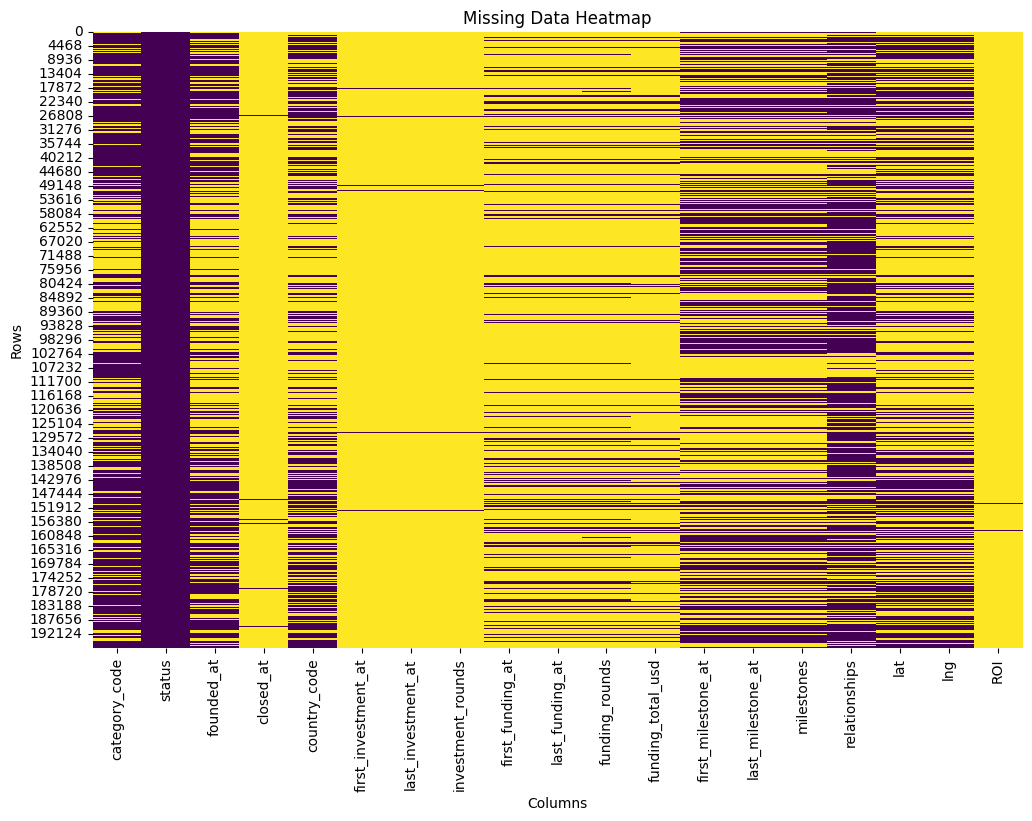

In [17]:
#Assuming 'data' is your DataFrame
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

# sns.heatmap(...): This creates the heatmap.
'''data.isnull() means This generates a DataFrame of the same shape as data,
 with True where the data is missing and False where it's not.'''
# cbar=False means Removes the color bar, which is not very useful in this context.
# cmap='viridis' means Sets the color map. where we can choose different color maps like 'YlGnBu', 'coolwarm', etc.

plt.title('Missing Data Heatmap')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

array([[<Axes: title={'center': 'investment_rounds'}>,
        <Axes: title={'center': 'funding_rounds'}>,
        <Axes: title={'center': 'funding_total_usd'}>],
       [<Axes: title={'center': 'milestones'}>,
        <Axes: title={'center': 'relationships'}>,
        <Axes: title={'center': 'lat'}>],
       [<Axes: title={'center': 'lng'}>, <Axes: title={'center': 'ROI'}>,
        <Axes: >]], dtype=object)

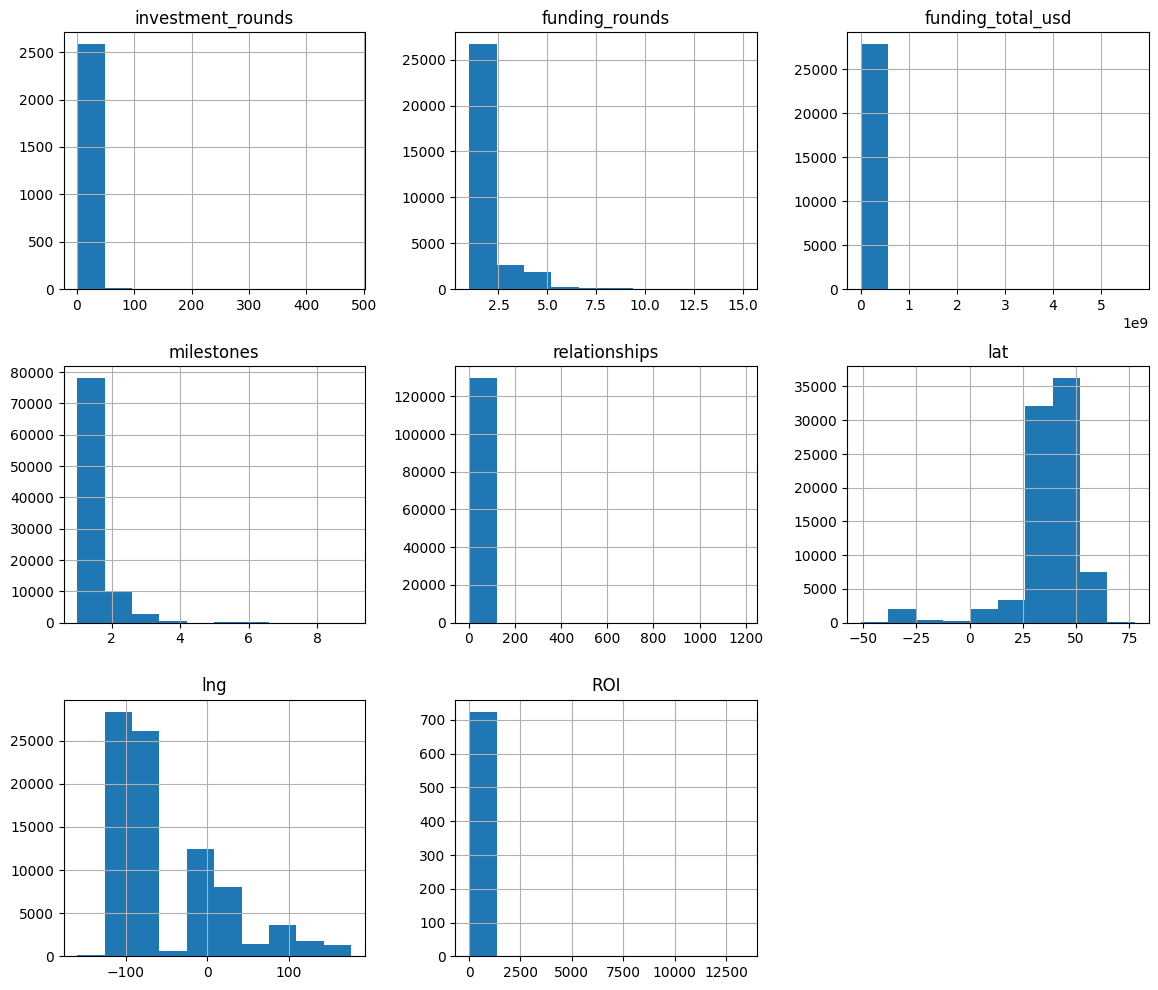

In [18]:
df.hist(figsize=(14, 12))

In [19]:
df.dtypes

category_code           object
status                  object
founded_at              object
closed_at               object
country_code            object
first_investment_at     object
last_investment_at      object
investment_rounds      float64
first_funding_at        object
last_funding_at         object
funding_rounds         float64
funding_total_usd      float64
first_milestone_at      object
last_milestone_at       object
milestones             float64
relationships          float64
lat                    float64
lng                    float64
ROI                    float64
dtype: object

In [20]:
'''calculate the correlation between numerical variables'''
# Filter out only numeric columns
numeric_data = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Display the correlation matrix
correlation_matrix

,investment_rounds,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,ROI
investment_rounds,1.000000,0.024396,-0.028161,0.177141,0.108258,0.000087,-0.050258,-0.153856
funding_rounds,0.024396,1.000000,0.247538,0.301662,0.206828,0.009679,-0.129863,-0.054402
funding_total_usd,-0.028161,0.247538,1.000000,0.132476,0.189499,-0.004019,-0.027673,-0.035738
milestones,0.177141,0.301662,0.132476,1.000000,0.281683,0.039993,-0.114848,-0.050463
relationships,0.108258,0.206828,0.189499,0.281683,1.000000,0.012803,-0.066016,-0.029466
lat,0.000087,0.009679,-0.004019,0.039993,0.012803,1.000000,-0.273809,0.033072
lng,-0.050258,-0.129863,-0.027673,-0.114848,-0.066016,-0.273809,1.000000,-0.002272
ROI,-0.153856,-0.054402,-0.035738,-0.050463,-0.029466,0.033072,-0.002272,1.000000


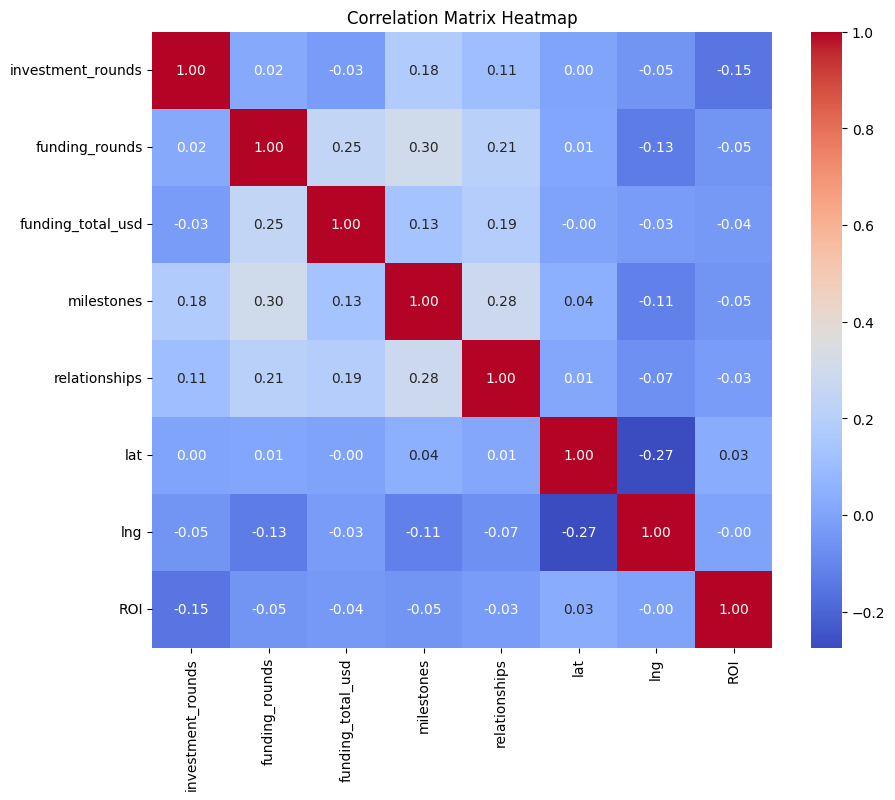

In [21]:
# visualize correlation_matrix with a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

plt.title('Correlation Matrix Heatmap')
plt.show()

In [22]:
# Calculate the correlation matrix
correlation_matrix

# Define a threshold for high correlation
threshold = 0.8

# Create a set to hold features to drop
to_drop = set()

# Iterate over the correlation matrix
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            to_drop.add(colname)

# Drop the columns with high correlation
df_reduced = df.drop(columns=to_drop)

# Print the columns to drop and the remaining columns
print("Columns to drop:", to_drop)
print("Remaining columns:", df_reduced.columns)

Columns to drop: set()
Remaining columns: Index(['category_code', 'status', 'founded_at', 'closed_at', 'country_code',
       'first_investment_at', 'last_investment_at', 'investment_rounds',
       'first_funding_at', 'last_funding_at', 'funding_rounds',
       'funding_total_usd', 'first_milestone_at', 'last_milestone_at',
       'milestones', 'relationships', 'lat', 'lng', 'ROI'],
      dtype='object')


In [23]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Print columns with missing values
print(missing_values[missing_values > 0])

category_code           73367
founded_at             105326
closed_at              193933
country_code           108563
first_investment_at    193970
last_investment_at     193970
investment_rounds      193962
first_funding_at       165046
last_funding_at        165046
funding_rounds         164846
funding_total_usd      168679
first_milestone_at     104854
last_milestone_at      104854
milestones             104854
relationships           66886
lat                    112701
lng                    112701
ROI                    195827
dtype: int64


In [24]:
# Remove rows with any missing values
df_cleaned = df.dropna()
# Remove columns with any missing values
df_cleaned = df.dropna(axis=1)

In [25]:
# Impute missing values in numerical columns with their mean
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

In [26]:
# Impute missing values in categorical columns with their mode (most frequent value)
for col in categorical_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [27]:
df.isnull().sum()

category_code          0
status                 0
founded_at             0
closed_at              0
country_code           0
first_investment_at    0
last_investment_at     0
investment_rounds      0
first_funding_at       0
last_funding_at        0
funding_rounds         0
funding_total_usd      0
first_milestone_at     0
last_milestone_at      0
milestones             0
relationships          0
lat                    0
lng                    0
ROI                    0
dtype: int64

In [28]:
# Separate numerical and categorical columns
numerical_columns = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_columns = [feature for feature in df.columns if df[feature].dtype == 'O']

# Print the number of numerical and categorical columns
print(f"We have {len(numerical_columns)} numerical columns: {numerical_columns}")
print(f"We have {len(categorical_columns)} categorical columns: {categorical_columns}")

We have 8 numerical columns: ['investment_rounds', 'funding_rounds', 'funding_total_usd', 'milestones', 'relationships', 'lat', 'lng', 'ROI']
We have 11 categorical columns: ['category_code', 'status', 'founded_at', 'closed_at', 'country_code', 'first_investment_at', 'last_investment_at', 'first_funding_at', 'last_funding_at', 'first_milestone_at', 'last_milestone_at']


## Boxplots using Seaborn

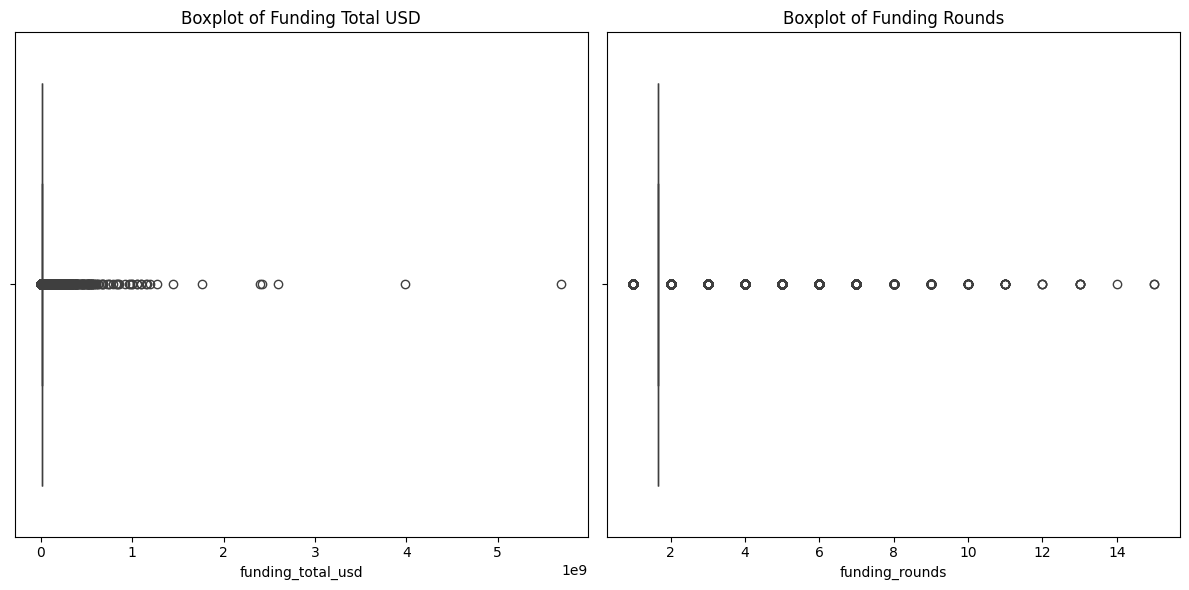

In [29]:
# Set the size of the plot
plt.figure(figsize=(12, 6))

# Create a boxplot for 'funding_total_usd'
plt.subplot(1, 2, 1)
sns.boxplot(x=df['funding_total_usd'])
plt.title('Boxplot of Funding Total USD')

# Create a boxplot for 'funding_rounds'
plt.subplot(1, 2, 2)
sns.boxplot(x=df['funding_rounds'])
plt.title('Boxplot of Funding Rounds')

# Show the plot
plt.tight_layout()
plt.show()

## Using IQR (Interquartile Range) to Remove Outliers

In [30]:
columns = ['funding_total_usd', 'funding_rounds']

# Create a copy of the DataFrame to avoid modifying the original
df_cleaned = df.copy()

# Remove outliers for specified columns
for column in columns:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df_cleaned[column].quantile(0.25)
    Q3 = df_cleaned[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define outlier condition
    outlier_condition = (df_cleaned[column] < (Q1 - 1.5 * IQR)) | (df_cleaned[column] > (Q3 + 1.5 * IQR))

    # Remove outliers
    df_cleaned = df_cleaned[~outlier_condition]

# Verify the cleaned DataFrame
print(df_cleaned.describe())

       investment_rounds  funding_rounds  funding_total_usd     milestones  \
count      164846.000000    164846.00000       1.648460e+05  164846.000000   
mean            2.364209         1.65976       1.481652e+07       1.155182   
std             0.484876         0.00000       1.862651e-09       0.250253   
min             1.000000         1.65976       1.481652e+07       1.000000   
25%             2.372057         1.65976       1.481652e+07       1.000000   
50%             2.372057         1.65976       1.481652e+07       1.199402   
75%             2.372057         1.65976       1.481652e+07       1.199402   
max           125.000000         1.65976       1.481652e+07       7.000000   

       relationships            lat            lng           ROI  
count  164846.000000  164846.000000  164846.000000  1.648460e+05  
mean        2.474356      37.333549     -50.152736  4.574504e+01  
std         6.343892       9.670405      41.990519  2.131635e-14  
min         1.000000     -50.

## Using Z-Scores to Remove Outliers

In [31]:
# Define columns for which to remove outliers
columns = ['funding_total_usd', 'funding_rounds']

# Create a copy of the DataFrame to avoid modifying the original
df_cleaned = df.copy()

# Remove outliers for specified columns
for column in columns:
    # Calculate z-scores
    z_scores = stats.zscore(df_cleaned[column].dropna())
    
    # Define threshold for z-scores
    threshold = 3
    
    # Identify outliers based on z-scores
    outlier_condition = abs(z_scores) > threshold
    
    # Remove outliers
    df_cleaned = df_cleaned[~df_cleaned[column].index.isin(df_cleaned[column].dropna().index[outlier_condition])]

# Verify the cleaned DataFrame
print(df_cleaned.describe())

       investment_rounds  funding_rounds  funding_total_usd     milestones  \
count      191211.000000   191211.000000       1.912110e+05  191211.000000   
mean            2.369130        1.600335       1.378188e+07       1.181409   
std             1.212043        0.215425       4.769881e+06       0.315684   
min             1.000000        1.000000       2.910000e+02       1.000000   
25%             2.372057        1.659760       1.481652e+07       1.000000   
50%             2.372057        1.659760       1.481652e+07       1.199402   
75%             2.372057        1.659760       1.481652e+07       1.199402   
max           478.000000        2.000000       9.100000e+07       7.000000   

       relationships            lat            lng            ROI  
count  191211.000000  191211.000000  191211.000000  191211.000000  
mean        2.669020      37.521147     -51.410838      45.796038  
std         7.130321      10.118171      45.245324      35.194128  
min         1.000000     

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196553 entries, 0 to 196552
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   category_code        196553 non-null  object 
 1   status               196553 non-null  object 
 2   founded_at           196553 non-null  object 
 3   closed_at            196553 non-null  object 
 4   country_code         196553 non-null  object 
 5   first_investment_at  196553 non-null  object 
 6   last_investment_at   196553 non-null  object 
 7   investment_rounds    196553 non-null  float64
 8   first_funding_at     196553 non-null  object 
 9   last_funding_at      196553 non-null  object 
 10  funding_rounds       196553 non-null  float64
 11  funding_total_usd    196553 non-null  float64
 12  first_milestone_at   196553 non-null  object 
 13  last_milestone_at    196553 non-null  object 
 14  milestones           196553 non-null  float64
 15  relationships    

# B. Date Transformation

### 1. Convert Date Columns to Years

In [33]:
date_columns = [
    'founded_at', 'closed_at', 'first_funding_at', 'last_funding_at',
    'first_milestone_at', 'last_milestone_at'
]

# Convert date columns to datetime format, then extract the year
for col in date_columns:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')  # Convert to datetime, errors='coerce' to handle invalid dates
        df[col + '_year'] = df[col].dt.year  # Extract year

# Drop the original date columns if needed
df.drop(columns=date_columns, inplace=True)

# Verify the changes
print(df.head())

     category_code     status country_code first_investment_at  \
0              web  operating          USA          2009-01-01   
1      games_video   acquired          USA          2009-01-01   
2      games_video   acquired          USA          2009-01-01   
3  network_hosting  operating          USA          2009-01-01   
4      games_video  operating          USA          2009-01-01   

  last_investment_at  investment_rounds  funding_rounds  funding_total_usd  \
0         2012-01-01           2.372057         3.00000       3.975000e+07   
1         2012-01-01           2.372057         1.65976       1.481652e+07   
2         2012-01-01           2.372057         1.65976       1.481652e+07   
3         2012-01-01           2.372057         1.65976       1.481652e+07   
4         2012-01-01           2.372057         1.65976       1.481652e+07   

   milestones  relationships        lat         lng        ROI  \
0    5.000000      17.000000  47.606209 -122.332071  15.500000   
1 

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196553 entries, 0 to 196552
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   category_code            196553 non-null  object 
 1   status                   196553 non-null  object 
 2   country_code             196553 non-null  object 
 3   first_investment_at      196553 non-null  object 
 4   last_investment_at       196553 non-null  object 
 5   investment_rounds        196553 non-null  float64
 6   funding_rounds           196553 non-null  float64
 7   funding_total_usd        196553 non-null  float64
 8   milestones               196553 non-null  float64
 9   relationships            196553 non-null  float64
 10  lat                      196553 non-null  float64
 11  lng                      196553 non-null  float64
 12  ROI                      196553 non-null  float64
 13  founded_at_year          196553 non-null  int32  
 14  clos

### 2. Generalize Categorical Data

#### 1. Generalize category_code

In [35]:
# Check the frequency of each value in 'category_code'
category_counts = df['category_code'].value_counts()

# Display the frequency counts in ascending order
print(category_counts.sort_values())

category_code
government             43
pets                   61
nanotech               70
nonprofit             184
design                281
automotive            291
messaging             296
real_estate           474
transportation        489
photo_video           544
fashion               563
music                 581
sports                675
manufacturing         680
semiconductor         696
news                  768
hospitality           768
local                 785
travel                936
legal                1012
analytics            1022
medical              1153
security             1171
social               1310
finance              1386
health               1698
cleantech            1940
search               2182
network_hosting      2350
public_relations     2846
education            2901
hardware             2951
biotech              4430
enterprise           4441
consulting           5006
advertising          6098
mobile               6862
games_video          752

Keep Top 10 Categories and Group Others as 'Other'

In [36]:
# Get the top 10 categories
top_10_categories = category_counts.head(10).index

# Replace less frequent categories with 'Other'
df['category_code_generalized'] = df['category_code'].apply(
    lambda x: x if x in top_10_categories else 'Other'
)

# Verify the changes
print(df['category_code_generalized'].value_counts())

category_code_generalized
software       91289
Other          33107
web            15118
other          13617
ecommerce       9065
games_video     7520
mobile          6862
advertising     6098
consulting      5006
enterprise      4441
biotech         4430
Name: count, dtype: int64


One-Hot Encoding category_code_generalized

In [37]:
# One-hot encode the generalized 'category_code'
category_encoded = pd.get_dummies(df['category_code_generalized'], prefix='category_code')

# Concatenate the one-hot encoded DataFrame with the original DataFrame
df = pd.concat([df, category_encoded], axis=1)

# Drop the original 'category_code' column
df.drop(columns=['category_code'], inplace=True)

# Verify the changes
print(df.head())

      status country_code first_investment_at last_investment_at  \
0  operating          USA          2009-01-01         2012-01-01   
1   acquired          USA          2009-01-01         2012-01-01   
2   acquired          USA          2009-01-01         2012-01-01   
3  operating          USA          2009-01-01         2012-01-01   
4  operating          USA          2009-01-01         2012-01-01   

   investment_rounds  funding_rounds  funding_total_usd  milestones  \
0           2.372057         3.00000       3.975000e+07    5.000000   
1           2.372057         1.65976       1.481652e+07    1.199402   
2           2.372057         1.65976       1.481652e+07    4.000000   
3           2.372057         1.65976       1.481652e+07    1.199402   
4           2.372057         1.65976       1.481652e+07    1.199402   

   relationships        lat  ...  category_code_advertising  \
0      17.000000  47.606209  ...                      False   
1       6.000000  34.021122  ...      

#### 2. Generalize country_code

In [38]:
# Check the frequency of each value in 'country_code'
country_counts = df['country_code'].value_counts()

# Display the frequency counts in ascending order
print(country_counts.sort_values())

country_code
NCL         1
NER         1
NFK         1
NIC         1
AND         1
        ...  
DEU      1921
CAN      3728
IND      3924
GBR      7372
USA    160200
Name: count, Length: 175, dtype: int64


In [39]:
# Get the top categories (e.g., top 15 or as needed)
top_countries = country_counts.head(15).index

# Replace less frequent countries with 'Other'
df['country_code_generalized'] = df['country_code'].apply(
    lambda x: x if x in top_countries else 'Other'
)

# Verify the changes
print(df['country_code_generalized'].value_counts())

country_code_generalized
USA      160200
Other      9573
GBR        7372
IND        3924
CAN        3728
DEU        1921
FRA        1652
AUS        1455
ESP        1100
IRL        1079
ISR        1042
NLD         866
CHN         732
SWE         705
ITA         626
FIN         578
Name: count, dtype: int64


In [40]:
# One-hot encode the generalized 'country_code'
country_encoded = pd.get_dummies(df['country_code_generalized'], prefix='country_code')

# Concatenate the one-hot encoded DataFrame with the original DataFrame
df = pd.concat([df, country_encoded], axis=1)

# Drop the original 'country_code' column
df.drop(columns=['country_code'], inplace=True)

# Verify the changes
print(df.head())

      status first_investment_at last_investment_at  investment_rounds  \
0  operating          2009-01-01         2012-01-01           2.372057   
1   acquired          2009-01-01         2012-01-01           2.372057   
2   acquired          2009-01-01         2012-01-01           2.372057   
3  operating          2009-01-01         2012-01-01           2.372057   
4  operating          2009-01-01         2012-01-01           2.372057   

   funding_rounds  funding_total_usd  milestones  relationships        lat  \
0         3.00000       3.975000e+07    5.000000      17.000000  47.606209   
1         1.65976       1.481652e+07    1.199402       6.000000  34.021122   
2         1.65976       1.481652e+07    4.000000      12.000000  37.562992   
3         1.65976       1.481652e+07    1.199402       2.852067  37.564512   
4         1.65976       1.481652e+07    1.199402       2.852067  37.564512   

          lng  ...  country_code_FRA  country_code_GBR  country_code_IND  \
0 -122.332

#### Create new feature 'isClosed' from closed_at and status.

In [41]:
# Create 'isClosed' column based on 'status' and 'closed_at'
df['isClosed'] = df.apply(
    lambda row: 1 if row['status'] in ['operating', 'ipo'] else (
        0 if row['status'] in ['acquired', 'closed'] else None
    ),
    axis=1
)

# Display the updated DataFrame
print(df[['isClosed']].head())


   isClosed
0         1
1         0
2         0
3         1
4         1


In [42]:
# Print all column names to verify
print(df.columns)

Index(['status', 'first_investment_at', 'last_investment_at',
       'investment_rounds', 'funding_rounds', 'funding_total_usd',
       'milestones', 'relationships', 'lat', 'lng', 'ROI', 'founded_at_year',
       'closed_at_year', 'first_funding_at_year', 'last_funding_at_year',
       'first_milestone_at_year', 'last_milestone_at_year',
       'category_code_generalized', 'category_code_Other',
       'category_code_advertising', 'category_code_biotech',
       'category_code_consulting', 'category_code_ecommerce',
       'category_code_enterprise', 'category_code_games_video',
       'category_code_mobile', 'category_code_other', 'category_code_software',
       'category_code_web', 'country_code_generalized', 'country_code_AUS',
       'country_code_CAN', 'country_code_CHN', 'country_code_DEU',
       'country_code_ESP', 'country_code_FIN', 'country_code_FRA',
       'country_code_GBR', 'country_code_IND', 'country_code_IRL',
       'country_code_ISR', 'country_code_ITA', 'country_

#### Create 'active_days'

#### Step 1: Replace values in closed_at based on status

In [43]:
# Replace the 'closed_at' values based on 'status'
df['closed_at_year'] = df.apply(
    lambda row: 2021 if row['status'] in ['operating', 'ipo'] else row['closed_at_year'],
    axis=1
)

# If status is 'acquired' or 'closed', set 'closed_at_year' to 0
df['closed_at_year'] = df.apply(
    lambda row: 0 if row['status'] in ['acquired', 'closed'] else row['closed_at_year'],
    axis=1
)

# Verify the changes
print(df[['status', 'closed_at_year']].head())


      status  closed_at_year
0  operating            2021
1   acquired               0
2   acquired               0
3  operating            2021
4  operating            2021


#### Step 2: Create active_days by subtracting founded_at_year from closed_at_year

In [44]:
# Calculate the active days
df['active_days'] = df.apply(
    lambda row: (row['closed_at_year'] - row['founded_at_year']) * 365 if row['closed_at_year'] != 0 else None,
    axis=1
)

# Verify the changes
print(df[['founded_at_year', 'closed_at_year', 'active_days']].head())

   founded_at_year  closed_at_year  active_days
0             2005            2021       5840.0
1             2011               0          NaN
2             2011               0          NaN
3             2008            2021       4745.0
4             2008            2021       4745.0


In [45]:
df.columns

Index(['status', 'first_investment_at', 'last_investment_at',
       'investment_rounds', 'funding_rounds', 'funding_total_usd',
       'milestones', 'relationships', 'lat', 'lng', 'ROI', 'founded_at_year',
       'closed_at_year', 'first_funding_at_year', 'last_funding_at_year',
       'first_milestone_at_year', 'last_milestone_at_year',
       'category_code_generalized', 'category_code_Other',
       'category_code_advertising', 'category_code_biotech',
       'category_code_consulting', 'category_code_ecommerce',
       'category_code_enterprise', 'category_code_games_video',
       'category_code_mobile', 'category_code_other', 'category_code_software',
       'category_code_web', 'country_code_generalized', 'country_code_AUS',
       'country_code_CAN', 'country_code_CHN', 'country_code_DEU',
       'country_code_ESP', 'country_code_FIN', 'country_code_FRA',
       'country_code_GBR', 'country_code_IND', 'country_code_IRL',
       'country_code_ISR', 'country_code_ITA', 'country_

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196553 entries, 0 to 196552
Data columns (total 48 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   status                     196553 non-null  object 
 1   first_investment_at        196553 non-null  object 
 2   last_investment_at         196553 non-null  object 
 3   investment_rounds          196553 non-null  float64
 4   funding_rounds             196553 non-null  float64
 5   funding_total_usd          196553 non-null  float64
 6   milestones                 196553 non-null  float64
 7   relationships              196553 non-null  float64
 8   lat                        196553 non-null  float64
 9   lng                        196553 non-null  float64
 10  ROI                        196553 non-null  float64
 11  founded_at_year            196553 non-null  int32  
 12  closed_at_year             196553 non-null  int64  
 13  first_funding_at_year      19

#### Step 1: Convert founded_at_year and closed_at_year to datetime

In [47]:
# Convert 'founded_at_year' and 'closed_at_year' to datetime objects
df['founded_at'] = pd.to_datetime(df['founded_at_year'], format='%Y')
df['closed_at'] = pd.to_datetime(df['closed_at_year'], format='%Y', errors='coerce')

# Verify the changes
print(df[['founded_at', 'closed_at']].head())

  founded_at  closed_at
0 2005-01-01 2021-01-01
1 2011-01-01        NaT
2 2011-01-01        NaT
3 2008-01-01 2021-01-01
4 2008-01-01 2021-01-01


#### Step 2: Calculate active_days

In [51]:
# Calculate active days
df['active_days'] = (df['closed_at'] - df['founded_at']).dt.days

# Verify the changes
print(df[['founded_at', 'closed_at', 'active_days']].head())

  founded_at  closed_at  active_days
0 2005-01-01 2021-01-01       5844.0
1 2011-01-01        NaT          NaN
2 2011-01-01        NaT          NaN
3 2008-01-01 2021-01-01       4749.0
4 2008-01-01 2021-01-01       4749.0


#### Step 3: Check for Contradictory Issues

In [48]:
nan_counts = df.isna().sum()

# Display the number of NaN values per column
print("Number of NaN values per column:")
print(nan_counts)


Number of NaN values per column:
status                           0
first_investment_at              0
last_investment_at               0
investment_rounds                0
funding_rounds                   0
funding_total_usd                0
milestones                       0
relationships                    0
lat                              0
lng                              0
ROI                              0
founded_at_year                  0
closed_at_year                   0
first_funding_at_year            0
last_funding_at_year             0
first_milestone_at_year          0
last_milestone_at_year           0
category_code_generalized        0
category_code_Other              0
category_code_advertising        0
category_code_biotech            0
category_code_consulting         0
category_code_ecommerce          0
category_code_enterprise         0
category_code_games_video        0
category_code_mobile             0
category_code_other              0
category_code_software

In [52]:
# Optionally, handle contradictory cases (e.g., drop or correct them)
df = df[df['active_days'] >= 0]

# Or, if you want to keep them with some default value (e.g., 0 days)
df['active_days'].fillna(0, inplace=True)

# Verify the final dataset
print(df[['founded_at', 'closed_at', 'active_days']].head())

  founded_at  closed_at  active_days
0 2005-01-01 2021-01-01       5844.0
3 2008-01-01 2021-01-01       4749.0
4 2008-01-01 2021-01-01       4749.0
5 2007-01-01 2021-01-01       5114.0
6 2008-01-01 2021-01-01       4749.0


In [55]:
df.isnull().sum()

status                       0
first_investment_at          0
last_investment_at           0
investment_rounds            0
funding_rounds               0
funding_total_usd            0
milestones                   0
relationships                0
lat                          0
lng                          0
ROI                          0
founded_at_year              0
closed_at_year               0
first_funding_at_year        0
last_funding_at_year         0
first_milestone_at_year      0
last_milestone_at_year       0
category_code_generalized    0
category_code_Other          0
category_code_advertising    0
category_code_biotech        0
category_code_consulting     0
category_code_ecommerce      0
category_code_enterprise     0
category_code_games_video    0
category_code_mobile         0
category_code_other          0
category_code_software       0
category_code_web            0
country_code_generalized     0
country_code_AUS             0
country_code_CAN             0
country_

Step 5: Final Verification

In [56]:
# Final check
print(df[['founded_at', 'closed_at', 'active_days']].describe())

                          founded_at            closed_at    active_days
count                         184575               184575  184575.000000
mean   2008-09-12 14:40:38.462413568  2021-01-01 00:00:00    4493.388444
min              1901-01-01 00:00:00  2021-01-01 00:00:00    2557.000000
25%              2009-01-01 00:00:00  2021-01-01 00:00:00    3653.000000
50%              2011-01-01 00:00:00  2021-01-01 00:00:00    3653.000000
75%              2011-01-01 00:00:00  2021-01-01 00:00:00    4383.000000
max              2014-01-01 00:00:00  2021-01-01 00:00:00   43830.000000
std                              NaN                  NaN    2588.496634


In [57]:
df.describe()

,investment_rounds,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,ROI,founded_at_year,closed_at_year,first_funding_at_year,last_funding_at_year,first_milestone_at_year,last_milestone_at_year,isClosed,active_days,founded_at,closed_at
count,184575.000000,184575.000000,1.845750e+05,184575.000000,184575.000000,184575.000000,184575.000000,184575.000000,184575.000000,184575.0,184575.000000,184575.000000,184575.000000,184575.000000,184575.0,184575.000000,184575,184575
mean,2.372529,1.659559,1.478684e+07,1.185897,2.760236,37.513313,-51.284704,45.744873,2008.699006,2021.0,2008.342695,2011.876348,2009.677871,2009.815143,1.0,4493.388444,2008-09-12 14:40:38.462413568,2021-01-01 00:00:00
min,1.000000,1.000000,2.910000e+02,1.000000,1.000000,-50.942326,-159.497746,15.500000,1901.000000,2021.0,1960.000000,1960.000000,1960.000000,1960.000000,1.0,2557.000000,1901-01-01 00:00:00,2021-01-01 00:00:00
25%,2.372057,1.659760,1.481652e+07,1.000000,1.000000,37.564512,-71.305928,45.745037,2009.000000,2021.0,2008.000000,2012.000000,2010.000000,2010.000000,1.0,3653.000000,2009-01-01 00:00:00,2021-01-01 00:00:00
50%,2.372057,1.659760,1.481652e+07,1.199402,2.852067,37.564512,-52.123066,45.745037,2011.000000,2021.0,2008.000000,2012.000000,2012.000000,2012.000000,1.0,3653.000000,2011-01-01 00:00:00,2021-01-01 00:00:00
75%,2.372057,1.659760,1.481652e+07,1.199402,2.852067,37.668821,-52.123066,45.745037,2011.000000,2021.0,2008.000000,2012.000000,2012.000000,2012.000000,1.0,4383.000000,2011-01-01 00:00:00,2021-01-01 00:00:00
max,478.000000,15.000000,3.985050e+09,9.000000,1189.000000,77.553604,176.212549,45.745037,2014.000000,2021.0,2013.000000,2013.000000,2014.000000,2014.000000,1.0,43830.000000,2014-01-01 00:00:00,2021-01-01 00:00:00
std,1.441361,0.464282,2.212317e+07,0.335775,7.375846,10.067678,45.229674,0.070399,7.086979,0.0,1.315726,0.935949,5.043469,5.008063,0.0,2588.496634,NaN,NaN


In [59]:
df.dtypes

status                               object
first_investment_at                  object
last_investment_at                   object
investment_rounds                   float64
funding_rounds                      float64
funding_total_usd                   float64
milestones                          float64
relationships                       float64
lat                                 float64
lng                                 float64
ROI                                 float64
founded_at_year                       int32
closed_at_year                        int64
first_funding_at_year                 int32
last_funding_at_year                  int32
first_milestone_at_year               int32
last_milestone_at_year                int32
category_code_generalized            object
category_code_Other                    bool
category_code_advertising              bool
category_code_biotech                  bool
category_code_consulting               bool
category_code_ecommerce         

Save the encode file into csv:

In [61]:
# Save the transformed DataFrame to a new CSV file
cleaned_data_file = r"D:\Work Station\startups\data\cleaned_data.csv"
df.to_csv(cleaned_data_file, index=False)